# Regiones con PCA

Intentemos ver si sale algo de aplicar PCA a la matriz de ocurrencias. Vamos a amasar primero los datos un poquito para quedarnos con aquellos con menor entropía...

In [1]:
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [8]:
df = pd.read_csv("/home/jmperez/Downloads/cantidadesTotalesOrdenada.csv")

columnas_palabras = df.columns[1:24]
columnas_usuarios = df.columns[25:-1]


Calculamos entropía y cantidad de provincias que utilizan esta palabra

In [12]:
from scipy.stats import entropy


df["cantProvincias"] = (df[columnas_palabras] > 0).sum(axis=1)
df["entropy"] = df[columnas_palabras].apply(entropy, axis=1)

Acá me quedo sólo con las palabras que:

- sean usadas al menos 40 veces
- las usen dos o más provincias

Esto último es para sacar la mayor parte de los topónimos que no nos interesan (suelen estar agrupados en única provincia)

In [14]:
min_provincias = 2
umbral = 40

df_todo = df
df = df.loc[(df.cantPalabra > umbral) & (df.cantProvincias >= min_provincias)].copy()

Gráfico de la entropía en función de la posición en el DataFrame

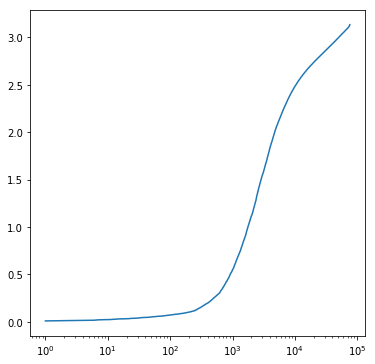

In [18]:
plt.rcParams['figure.figsize'] = (6, 6)


df.sort_values(by="entropy", ascending=True, inplace=True)

plt.semilogx(range(df.shape[0]), df.entropy);

Nos quedamos con algo < 5K, que es donde parece subir mucho la entropía.

Veamos cuántas provincias usan la palabra de las primeras 5000

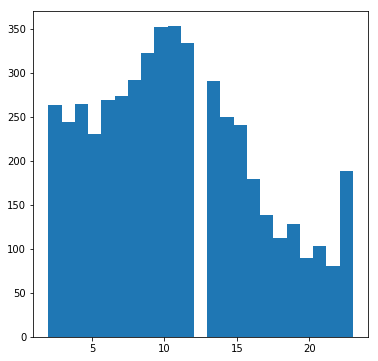

In [33]:
plt.rcParams['figure.figsize'] = (6, 6)
limite = 5* 10 ** 3
hist(df[:limite].cantProvincias, bins=23);

Apliquemos PCA para encontrar alguna suerte de región de uso de las palabras

In [34]:
from sklearn import decomposition

plt.rcParams['figure.figsize'] = (6, 6)

pca = decomposition.PCA(n_components=componentes)

X = df[:limite][cant_palabras].as_matrix()
print(X.shape)
pca.fit(X)


(5000, 23)


PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

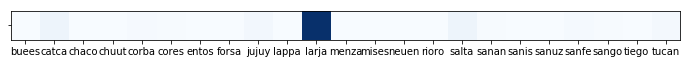

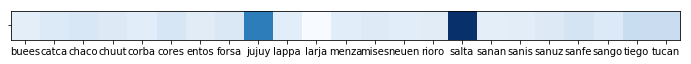

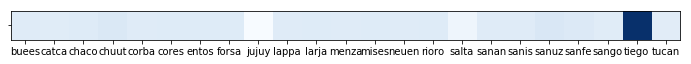

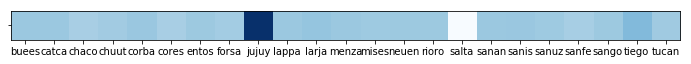

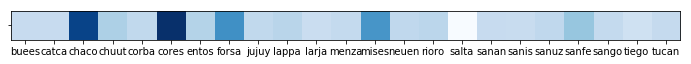

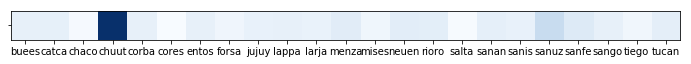

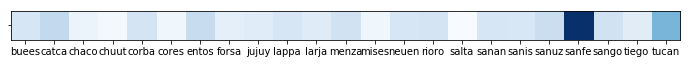

In [35]:
prov_labels = [x.split("P")[0] for x in cant_palabras]
prov_labels = [x[:3] + x[-2:] for x in prov_labels]

plt.rcParams['figure.figsize'] = (12, 15)
no_comp = len(pca.components_)

for i, component in enumerate(pca.components_):
    plt.subplot(no_comp, 1, i+1)
    
    plt.imshow(component.reshape(1, -1), cmap=plt.cm.Blues)
    plt.xticks(range(23), prov_labels)
    plt.yticks(range(1), [''])
    plt.show()
    

De acá lo que podemos ver:

1. Región "La Rioja" => será por los problemas que tenemos en los datos?
2. Jujuy + Salta, aportan un poco Tierra del Fuego (!) y Tucumán.
3. Tierra del Fuego. Desconozco razón
4. Jujuy y algo de Tierra del Fuego...
4. La más linda: Corrientes, Chaco, Formosa, Misiones, un

In [36]:
for i, component in enumerate(pca.components_):
    print("="*40)
    print("componente {}\n\n".format(i+1))
    x = pd.Series(component, index=prov_labels)
    
    print(x.sort_values(ascending=False))
        

componente 1


larja    0.996671
salta    0.050993
catca    0.048658
jujuy    0.026724
tucan    0.017494
sanfe    0.013911
corba    0.010392
sanan    0.008333
sango    0.008136
cores    0.007680
sanuz    0.005001
mises    0.004934
chaco    0.004627
menza    0.004006
chuut    0.003665
lappa    0.003647
tiego    0.003311
forsa    0.003272
entos    0.002779
buees    0.002707
sanis    0.002328
neuen    0.002202
rioro    0.001469
dtype: float64
componente 2


salta    0.794772
jujuy    0.538142
tiego    0.133827
tucan    0.132179
sanfe    0.088807
cores    0.076307
chaco    0.069470
forsa    0.057364
catca    0.049667
sango    0.049555
chuut    0.048735
sanuz    0.043738
mises    0.040297
entos    0.032552
rioro    0.031825
menza    0.028335
neuen    0.027173
lappa    0.026977
corba    0.026968
sanis    0.023812
buees    0.022606
sanan    0.019488
larja   -0.064594
dtype: float64
componente 3


tiego    0.986408
sanuz    0.035037
chuut    0.027945
sanfe    0.018570
cores    0.006564
chaco  